In [1]:
!pip install realtabformer &> /dev/null
from realtabformer import REaLTabFormer
from realtabformer import rtf_validators as rtf_val

In [2]:
rtf_model = REaLTabFormer(
    model_type="tabular",
    batch_size=64,
    epochs=5,
    gradient_accumulation_steps=4,
    logging_steps=100)

In [3]:
import pandas as pd

data = pd.read_csv("diabetes_train.csv")

In [4]:
%%time
rtf_model.fit(data, num_bootstrap=10)

Computing the sensitivity threshold...


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:536: UserWarning: The frac (0.165) set results to a sample larger than                     frac_max_data=10000. Setting frac to 0.125.
  warnings.warn(


Bootstrap round:   0%|          | 0/10 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    10.000000
mean      0.003777
std       0.001088
min       0.001600
25%       0.003261
50%       0.003954
75%       0.004340
max       0.005392
dtype: float64
Sensitivity threshold: 0.005074587927362212 qt_max: 0.05


Map:   0%|          | 0/80000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss
100,1.042700
200,0.861500
300,0.854200
400,0.850600
500,0.846800
600,0.845200
700,0.843100
800,0.842800
900,0.842000
1000,0.841200


  0%|          | 0/30000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 30080 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 5,                     sensitivity_threshold: 0.005074587927362212,                         val_sensitivity: 0.0055866029710636015,                             val_sensitivities: [0.005126480947806597, 0.003900498408695131, 0.004143697832222424, 0.0045697676745442535, 0.006230039620602714, 0.006826786464690933, 0.005963693859578896, 0.006854246312123455, 0.005069850292210392, 0.004586244169986187, 0.006668234305269267, 0.006436633247283425, 0.006450780312124851, 0.004733624191966697, 0.0062384669268487946]


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:834: UserWarning: No best model was saved. Loading the closest model to the sensitivity_threshold.
  warnings.warn(


CPU times: user 13min 42s, sys: 1min 7s, total: 14min 50s
Wall time: 16min 25s


In [5]:
# Generating Synthetic Data
synthetic_data = rtf_model.sample(n_samples=len(data))
synthetic_data.head()

  0%|          | 0/80000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 80000 samples generated. Sampling efficiency is: 100.0000%


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,52.0,0,0,never,27.72,6.0,130,0
1,Male,4.0,0,0,No Info,16.03,6.6,126,0
2,Female,53.0,0,0,former,27.32,5.7,90,0
3,Female,71.0,0,0,never,37.62,6.1,158,0
4,Female,63.0,0,0,never,37.34,6.2,300,1


In [ ]:
#synthetic_data.to_csv("diabetes_synthetic_RTF_may7.csv", index=False)

### Using Table Evaluator


In [6]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install table_evaluator
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [8]:
from table_evaluator import TableEvaluator
print(data.shape,synthetic_data.shape)

(80000, 9) (80000, 9)


In [9]:
X_test = pd.read_csv("diabetes_test.csv")

In [10]:
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,13.0,0,0,No Info,20.82,5.8,126,0
1,Female,3.0,0,0,No Info,21.00,5.0,145,0
2,Male,63.0,0,0,former,25.32,3.5,200,0
3,Female,2.0,0,0,never,17.43,6.1,126,0
4,Female,33.0,0,0,not current,40.08,6.2,200,1


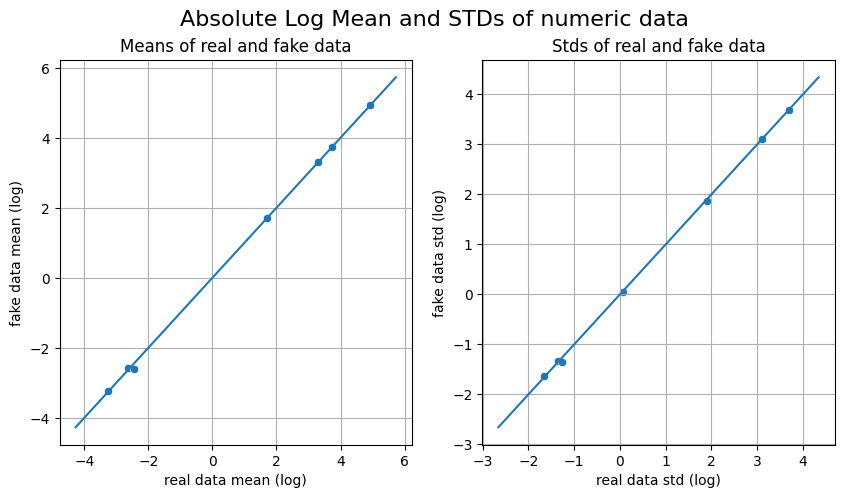

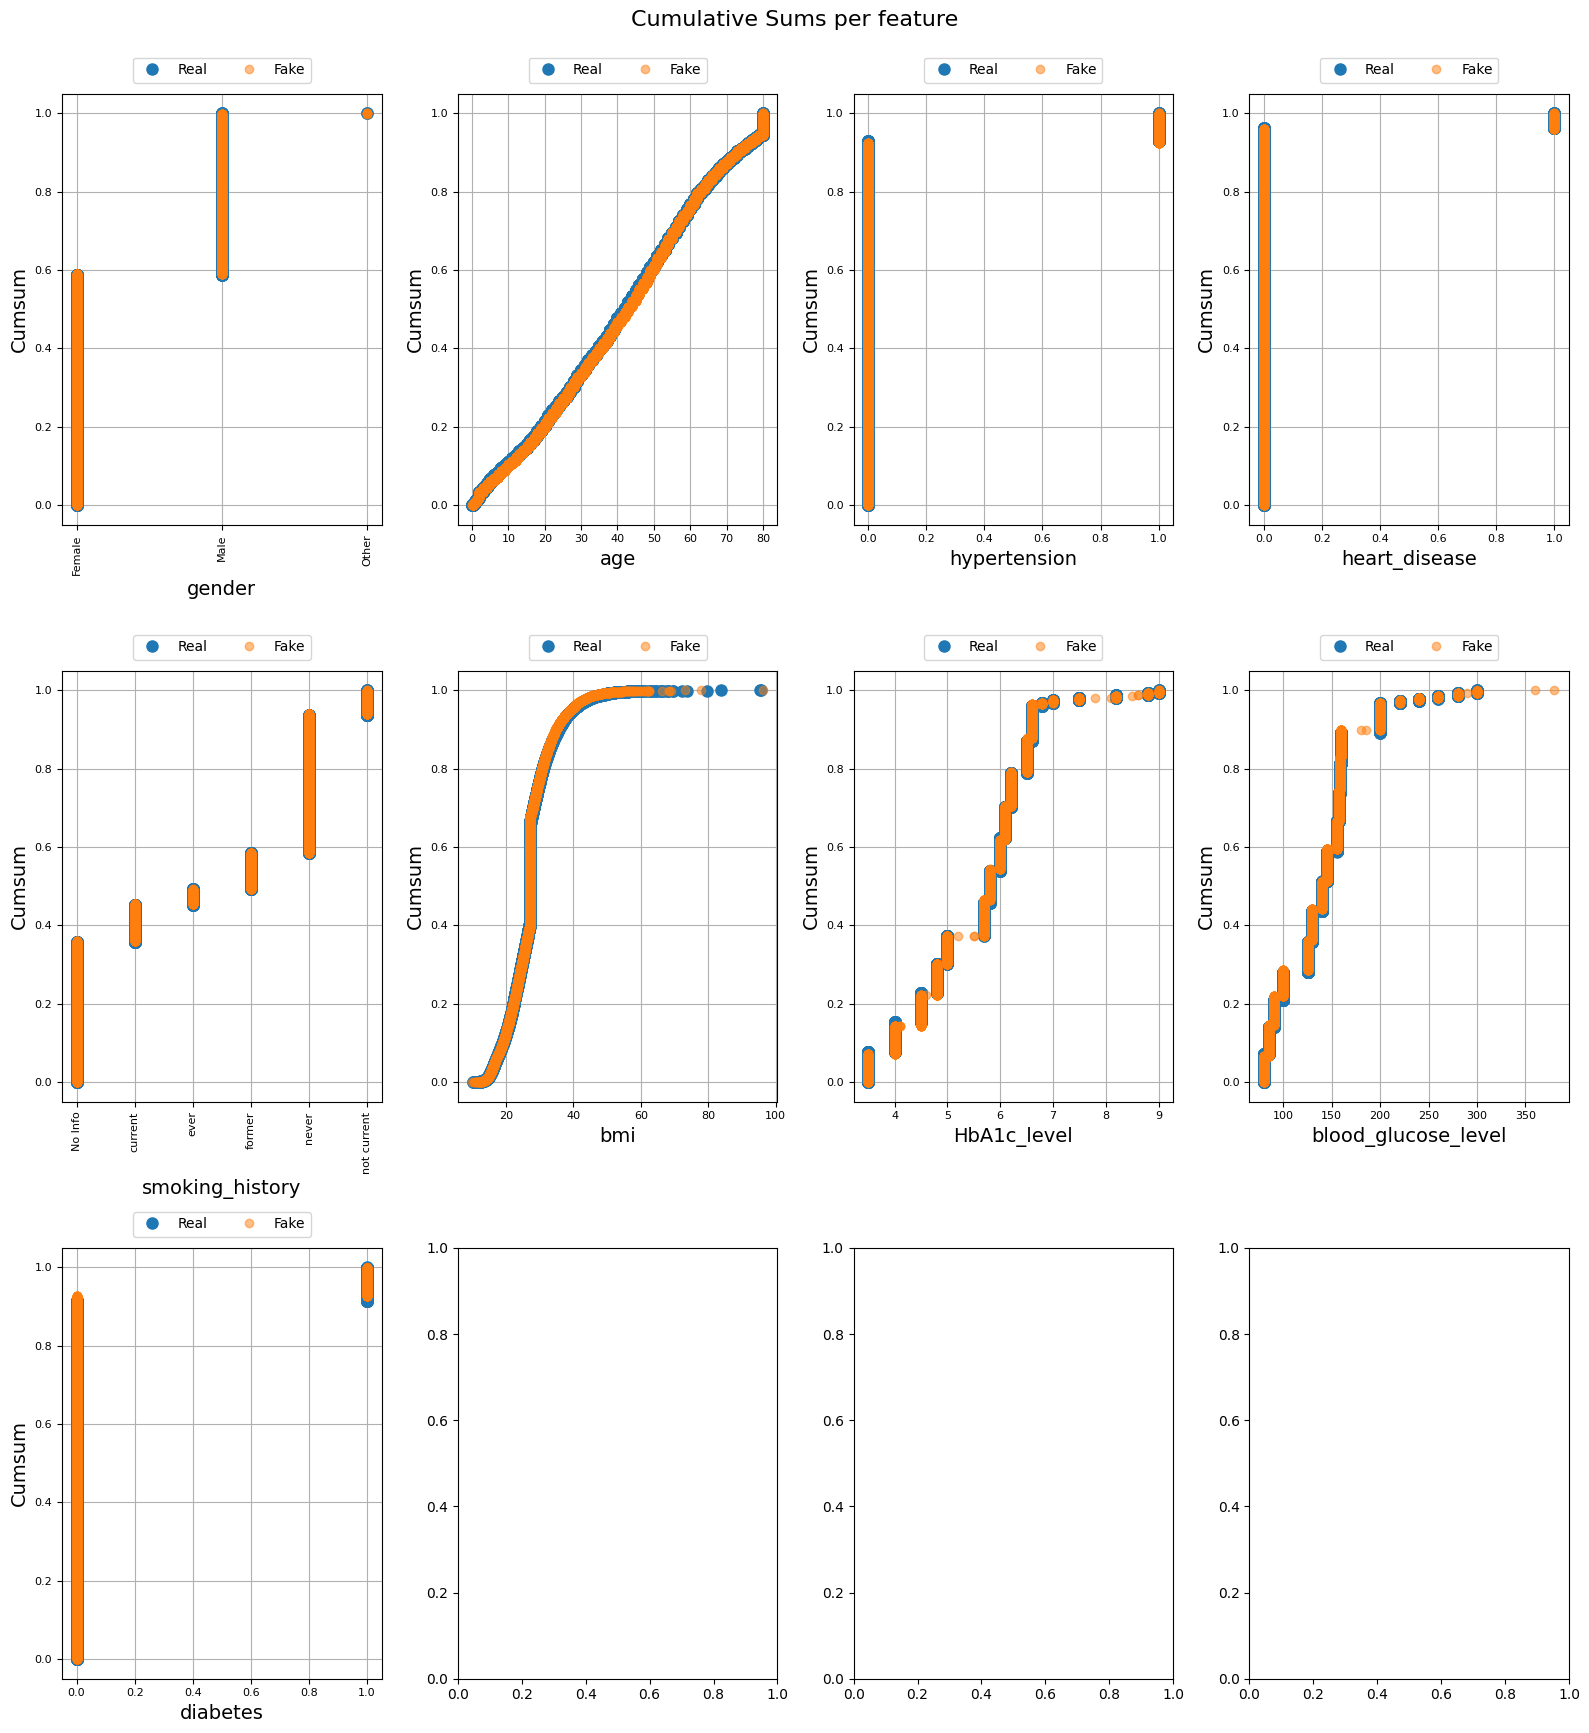

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


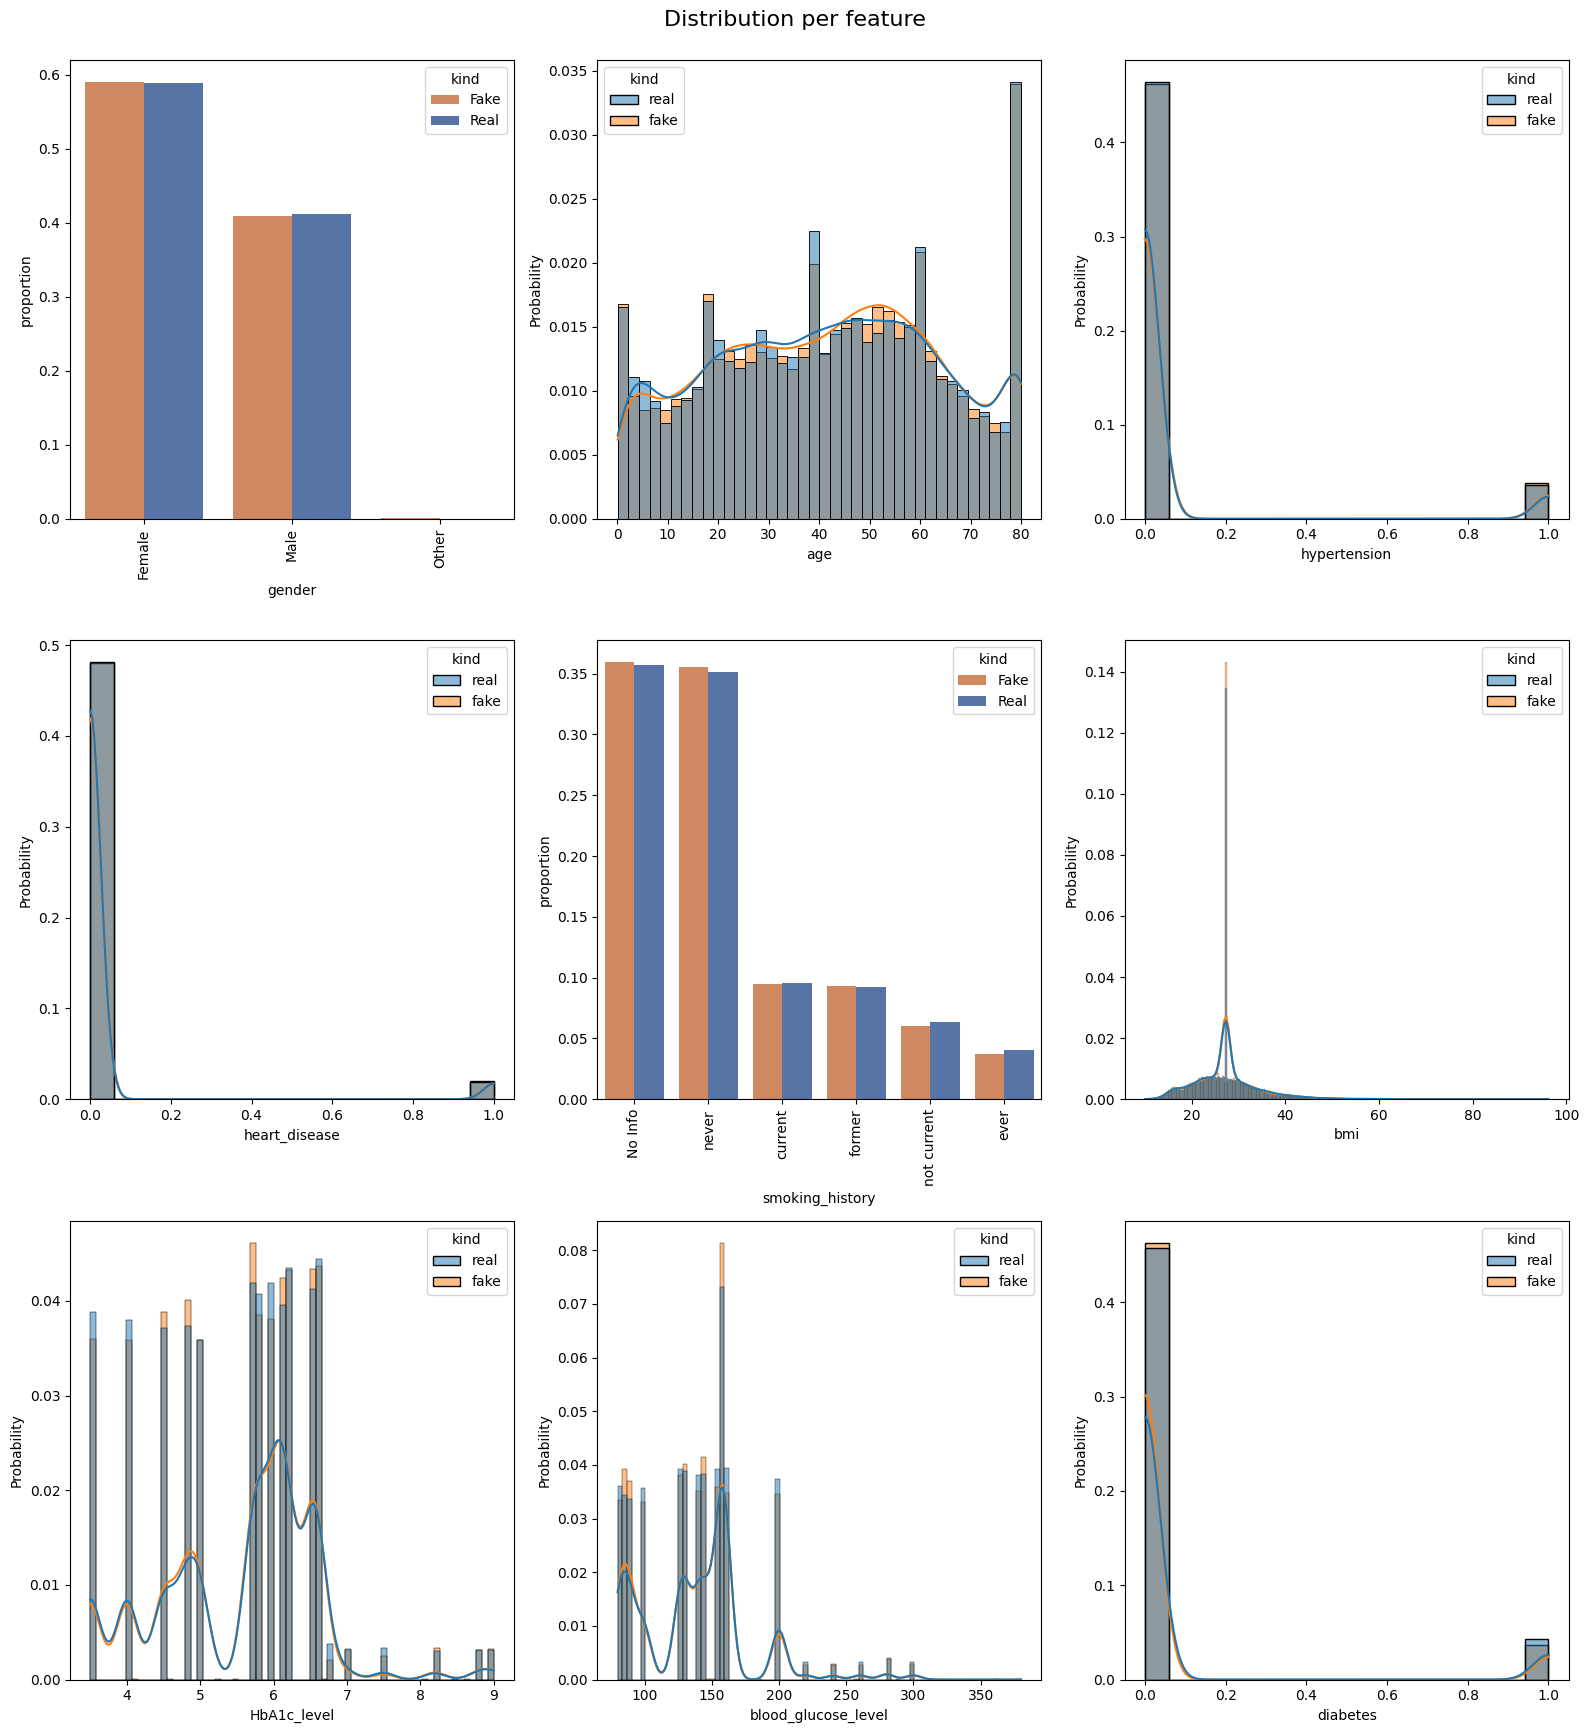

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/li

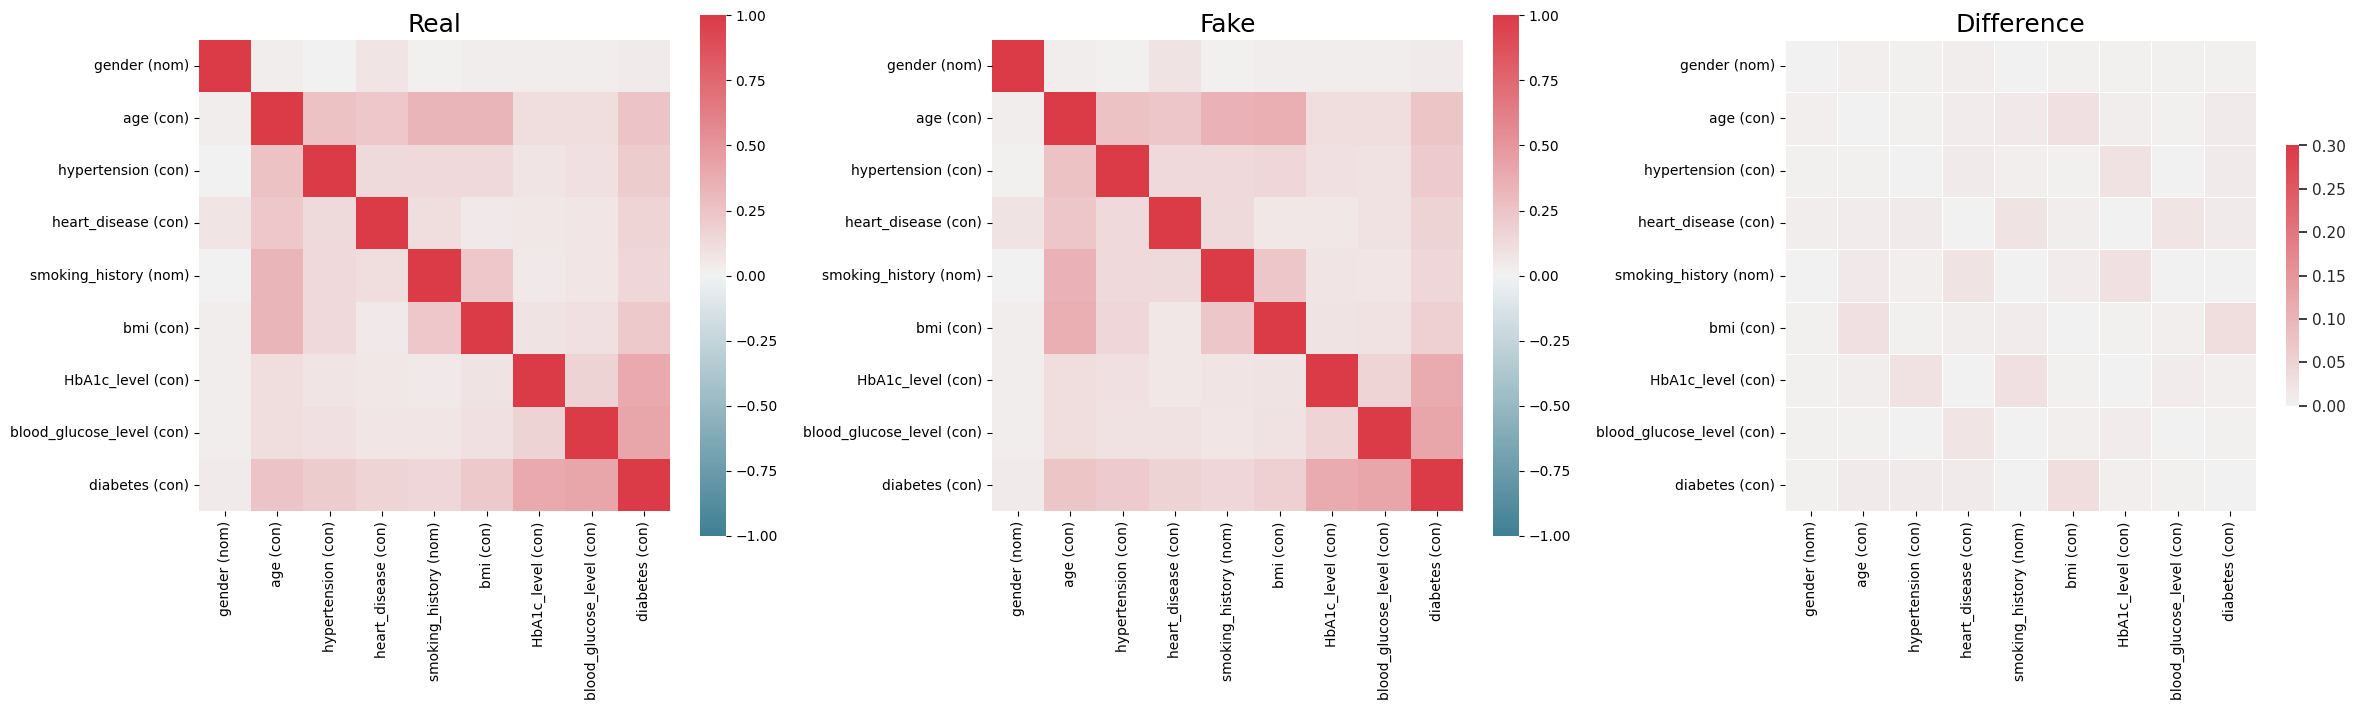

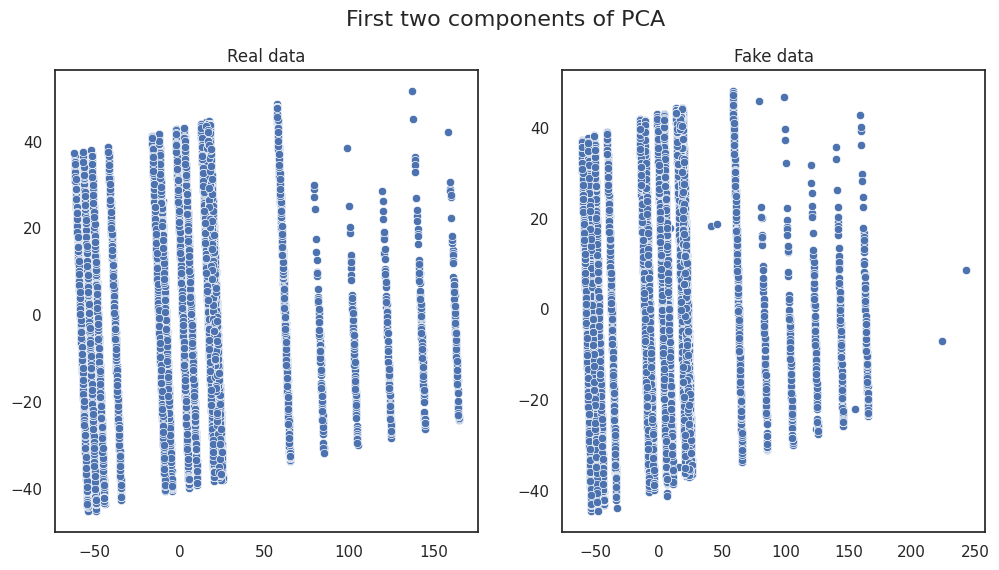

In [11]:
table_evaluator = TableEvaluator(X_test,synthetic_data[:len(X_test)])
#table_evaluator = TableEvaluator(data,synthetic_data)
table_evaluator.visual_evaluation()

In [ ]:
table_evaluator.evaluate(target_col='smoking_history')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.3520   0.3710              0.2070
DecisionTreeClassifier_real   0.3463   0.3555              0.2085
LogisticRegression_fake       0.4260   0.4303              0.9116
LogisticRegression_real       0.4412   0.4405              0.9296
MLPClassifier_fake            0.4757   0.4783              0.8722
MLPClassifier_real            0.4602   0.4567              0.8757
RandomForestClassifier_fake   0.4285   0.4353              0.3396
RandomForestClassifier_real   0.4213   0.4145              0.3365

Privacy results:
                                             result
Duplicate rows between sets (real/fake)  (378, 446)
nearest neighbor mean                        0.3014
nearest neighbor std                         0.2659

Miscellaneous results:
                                  R

## Evaluating Using SDV Library

In [30]:
!pip install sdv

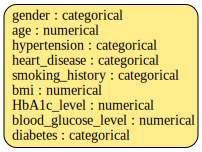

In [31]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.visualize()

In [32]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

diagnostic = run_diagnostic(
    X_test,
    synthetic_data,
    metadata
)
quality_report = evaluate_quality(
    X_test,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 76.46it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 269.68it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 29.88it/s]|
Column Shapes Score: 99.22%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:01<00:00, 20.04it/s]|
Column Pair Trends Score: 99.44%

Overall Score (Average): 99.33%



In [33]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,gender,TVComplement,0.995663
1,age,KSComplement,0.988550
2,hypertension,TVComplement,0.998825
3,heart_disease,TVComplement,0.996700
4,smoking_history,TVComplement,0.995725
5,bmi,KSComplement,0.985800
6,HbA1c_level,KSComplement,0.991237
7,blood_glucose_level,KSComplement,0.987300
8,diabetes,TVComplement,0.989725


### Calculate Range Coverage and KSComplement for Numerical Variables

In [34]:
from sdmetrics.single_column import RangeCoverage, KSComplement
for i in ['bmi','HbA1c_level']:
  range_cov = RangeCoverage.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  ks = KSComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Range coverage for {i} is: {range_cov}")
  print(f"KSComplement for {i} is: {ks}")

Range coverage for bmi is: 1
KSComplement for bmi is: 0.9858
Range coverage for HbA1c_level is: 1.0
KSComplement for HbA1c_level is: 0.9912375


### Calculate Category Coverage and TVComplement for Categorical Variables

In [35]:
from sdmetrics.single_column import CategoryCoverage, TVComplement
for i in ['smoking_history','diabetes']:
  cat_cov = CategoryCoverage.compute(
    real_data=X_test[i],
    synthetic_data=synthetic_data[i]
  )
  tv = TVComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Category coverage for {i} is: {cat_cov}")
  print(f"TVComplement for {i} is: {tv}")

Category coverage for smoking_history is: 1.0
TVComplement for smoking_history is: 0.995725
Category coverage for diabetes is: 1.0
TVComplement for diabetes is: 0.989725


### Looking at Wasserstein Distance


In [12]:
from scipy.stats import wasserstein_distance

In [13]:
wasserstein_distances = {}
for column in X_test.columns[5:]:
    wasserstein_dist = wasserstein_distance(X_test[column], synthetic_data[column])
    wasserstein_distances[column] = wasserstein_dist

In [16]:
# Print Wasserstein distances for Testing vs Synthetic
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Synthetic Data {column}: {distance}')

Comparing Testing data and Synthetic Data bmi: 0.0843502499999998
Comparing Testing data and Synthetic Data HbA1c_level: 0.01321375000000007
Comparing Testing data and Synthetic Data blood_glucose_level: 0.2424875000000038
Comparing Testing data and Synthetic Data diabetes: 0.000500000000000056


In [17]:
# Print Wasserstein distances for Testing vs Training
wasserstein_distances = {}
for column in X_test.columns[5:]:
    wasserstein_dist = wasserstein_distance(X_test[column], data[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Training Data {column}: {distance}')

Comparing Testing data and Training Data bmi: 0.0843502499999998
Comparing Testing data and Training Data HbA1c_level: 0.01321375000000007
Comparing Testing data and Training Data blood_glucose_level: 0.2424875000000038
Comparing Testing data and Training Data diabetes: 0.000500000000000056


In [19]:
# Calculate KL Divergence for Testing vs Synthetic
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[5:]:
    kl_divergence = entropy(X_test[column], synthetic_data[:20000][column])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'{column}: {divergence}')

bmi: 0.05542106126836338
HbA1c_level: 0.03863711265300419
blood_glucose_level: 0.08332520034774031
diabetes: inf


In [20]:
# Calculate KL Divergence for Testing vs Training
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[5:]:
    kl_divergence = entropy(X_test[column], data[:20000][column])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'For Training vs Testing Data {column}: {divergence}')

For Training vs Testing Data bmi: 0.05766041660713487
For Training vs Testing Data HbA1c_level: 0.03949526584534168
For Training vs Testing Data blood_glucose_level: 0.08392210174192599
For Training vs Testing Data diabetes: inf


In [36]:
# Pearson Coefficient wasn't used in the paper.
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient for each feature
pearson_correlations = {}
for column in X_test.columns[5:]:
    correlation, _ = pearsonr(X_test[column], synthetic_data[:20000][column])
    pearson_correlations[column] = correlation

# Print Pearson correlation coefficients for each feature
for column, correlation in pearson_correlations.items():
    print(f' Comparing testing and synthetic data {column}: {correlation}')

 Comparing testing and synthetic data bmi: 0.01465311129500948
 Comparing testing and synthetic data HbA1c_level: 0.001721858192339029
 Comparing testing and synthetic data blood_glucose_level: 0.011773127532284133
 Comparing testing and synthetic data diabetes: 0.0070510421122922055


In [22]:
# Check for MSE and r2
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE between testing_data and real_data
mse_real = mean_squared_error(X_test['bmi'], data[:20000]['bmi'])
print("MSE between Testing Data and Real Data:", mse_real)

# Calculate MSE between testing_data and synthetic_data
mse_synthetic = mean_squared_error(X_test['bmi'], synthetic_data[:20000]['bmi'])
print("MSE between Testing Data and Synthetic Data:", mse_synthetic)

# Calculate R-squared (R2) score
r2 = r2_score(X_test['bmi'], data[:20000]['bmi'])
print("R-squared Score (between Testing Data and Real Data):", r2)

r2 = r2_score(X_test['bmi'], synthetic_data[:20000]['bmi'])
print("R-squared Score (between Testing Data and Synthetic Data):", r2)

MSE between Testing Data and Real Data: 89.76393477
MSE between Testing Data and Synthetic Data: 85.53663841
R-squared Score (between Testing Data and Real Data): -0.9868047213716356
R-squared Score (between Testing Data and Synthetic Data): -0.8932391664724966


In [29]:
# Find common duplicate rows (RTF and GreaT models created a lot of duplicates)
common_duplicates = pd.merge(data, synthetic_data, how='inner')
new = common_duplicates.drop_duplicates()
# Print the common duplicate rows
print("Common Duplicate Rows:")
print(common_duplicates)
print(new)

Common Duplicate Rows:
      gender   age  hypertension  heart_disease smoking_history    bmi  \
0       Male  31.0             0              0         No Info  27.32   
1     Female  42.0             0              0         No Info  27.32   
2     Female  42.0             0              0         No Info  27.32   
3     Female  61.0             0              0           never  27.32   
4     Female  61.0             0              0           never  27.32   
...      ...   ...           ...            ...             ...    ...   
6775  Female  38.0             0              0         No Info  27.32   
6776    Male  66.0             0              0         No Info  27.32   
6777    Male  66.0             0              0         No Info  27.32   
6778    Male  16.0             0              0         No Info  27.32   
6779  Female  55.0             0              0           never  27.32   

      HbA1c_level  blood_glucose_level  diabetes  
0             6.5                  13

### Everything below was written to create bar charts.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tvae=pd.read_csv('diabetes_synthetic_TVAE250_2.csv')

In [ ]:
great=pd.read_csv('diabetes_synthetic_GReaT_10ep.csv')

In [ ]:
ctgan = pd.read_csv('synthetic_diabetes_ctgan300_2.csv')

In [ ]:
proportions1 = data['smoking_history'].value_counts(normalize=True).sort_index()
proportions2 = synthetic_data['smoking_history'].value_counts(normalize=True).sort_index()
proportions3 = tvae['smoking_history'].value_counts(normalize=True).sort_index()
proportions4 = ctgan['smoking_history'].value_counts(normalize=True).sort_index()
proportions5 = great['smoking_history'].value_counts(normalize=True).sort_index()



In [ ]:
great.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
great['smoking_history'].unique()

array(['No Info', 'never', 'not current', 'former', 'current', 'ever',
       'blood_glucose_level', 'bmi', '0', 'heart_disease'], dtype=object)

In [ ]:
data['smoking_history'].unique()

array(['former', 'never', 'ever', 'not current', 'current', 'No Info'],
      dtype=object)

In [ ]:


# Find unique values in 'great' not in 'data'
unique_values = set(great['smoking_history']) - set(data['smoking_history'])
great[great['smoking_history'].isin(unique_values)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
14408,Male,60.0,0.0,0.0,blood_glucose_level,27.32,4.8,140.0,0.0
28079,Male,46.0,0.0,0.0,bmi,40.41,5.7,160.0,0.0
50183,Female,45.0,0.0,0.0,0,27.32,6.1,155.0,0.0
76782,Female,29.0,0.0,0.0,heart_disease,27.32,6.5,200.0,0.0


In [ ]:
great['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
print(proportions1)
print(proportions2)
print(proportions3)
print(proportions4)

smoking_history
No Info        0.358337
current        0.092287
ever           0.040025
former         0.093875
never          0.350813
not current    0.064662
Name: proportion, dtype: float64
smoking_history
No Info        0.354687
current        0.096113
ever           0.037200
former         0.092912
never          0.356863
not current    0.062225
Name: proportion, dtype: float64
smoking_history
No Info        0.229800
current        0.101112
ever           0.043788
former         0.211962
never          0.336413
not current    0.076925
Name: proportion, dtype: float64
smoking_history
0                      0.000013
No Info                0.420988
blood_glucose_level    0.000013
bmi                    0.000013
current                0.064738
ever                   0.019213
former                 0.062600
heart_disease          0.000013
never                  0.391600
not current            0.040813
Name: proportion, dtype: float64


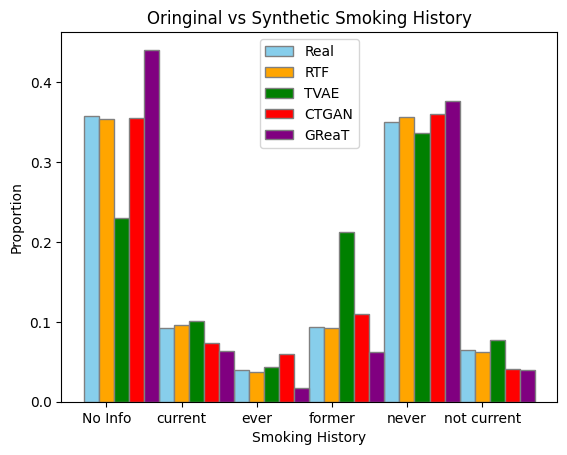

In [ ]:
import numpy as np

# Creating a bar width
bar_width = 0.2

# Setting positions of bars
r1 = np.arange(len(proportions1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create the bars
plt.bar(r1, proportions1, color='skyblue', width=bar_width, edgecolor='grey', label='Real')
plt.bar(r2, proportions2, color='orange', width=bar_width, edgecolor='grey', label='RTF')
plt.bar(r3, proportions3, color='green', width=bar_width, edgecolor='grey', label='TVAE')
plt.bar(r4, proportions4, color='red', width=bar_width, edgecolor='grey', label='CTGAN')
plt.bar(r5, proportions5, color='purple', width=bar_width, edgecolor='grey', label='GReaT')

# Add xticks on the middle of the group bars
plt.xlabel('Smoking History')
plt.xticks([r + bar_width for r in range(len(proportions3))], proportions1.index)

# Create legend & Show graphic
plt.ylabel('Proportion')
plt.title('Oringinal vs Synthetic Smoking History')
plt.legend()

plt.show()


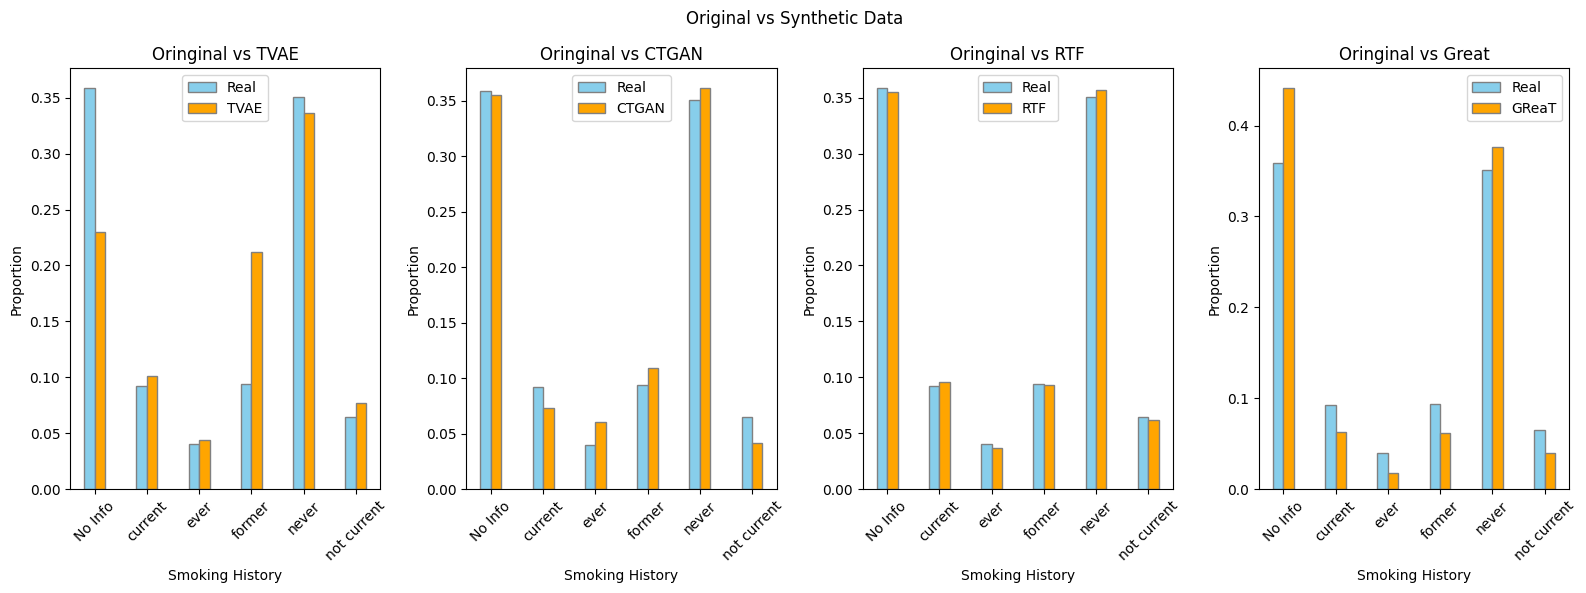

In [ ]:
import numpy as np

# Creating a bar width
bar_width = 0.2

# Setting positions of bars
r1 = np.arange(len(proportions1))
r2 = [x + bar_width for x in r1]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

# Create the bars
axes[0].bar( r1, proportions1, color='skyblue', width=bar_width, edgecolor='grey', label='Real')
axes[0].bar( r2, proportions3, color='orange', width=bar_width, edgecolor='grey', label='TVAE')

axes[2].bar( r1, proportions1, color='skyblue', width=bar_width, edgecolor='grey', label='Real')
axes[2].bar( r2, proportions2, color='orange', width=bar_width, edgecolor='grey', label='RTF')

axes[1].bar( r1, proportions1, color='skyblue', width=bar_width, edgecolor='grey', label='Real')
axes[1].bar( r2, proportions4, color='orange', width=bar_width, edgecolor='grey', label='CTGAN')

axes[3].bar( r1, proportions1, color='skyblue', width=bar_width, edgecolor='grey', label='Real')
axes[3].bar( r2, proportions5, color='orange', width=bar_width, edgecolor='grey', label='GReaT')

# Add xticks on the middle of the group bars
for i in range(4):
  axes[i].set_xlabel('Smoking History')
  axes[i].set_xticks([r + bar_width/2 for r in range(len(proportions1))], proportions1.index,rotation=45)
  axes[i].set_ylabel('Proportion')
  axes[i].set_title('Oringinal vs Synthetic Smoking History')
  axes[i].legend()


# Create legend & Show graphic


axes[0].set_title('Oringinal vs TVAE')
axes[1].set_title('Oringinal vs CTGAN')
axes[2].set_title('Oringinal vs RTF')
axes[3].set_title('Oringinal vs Great')

plt.suptitle('Original vs Synthetic Data')
plt.tight_layout()

plt.show()

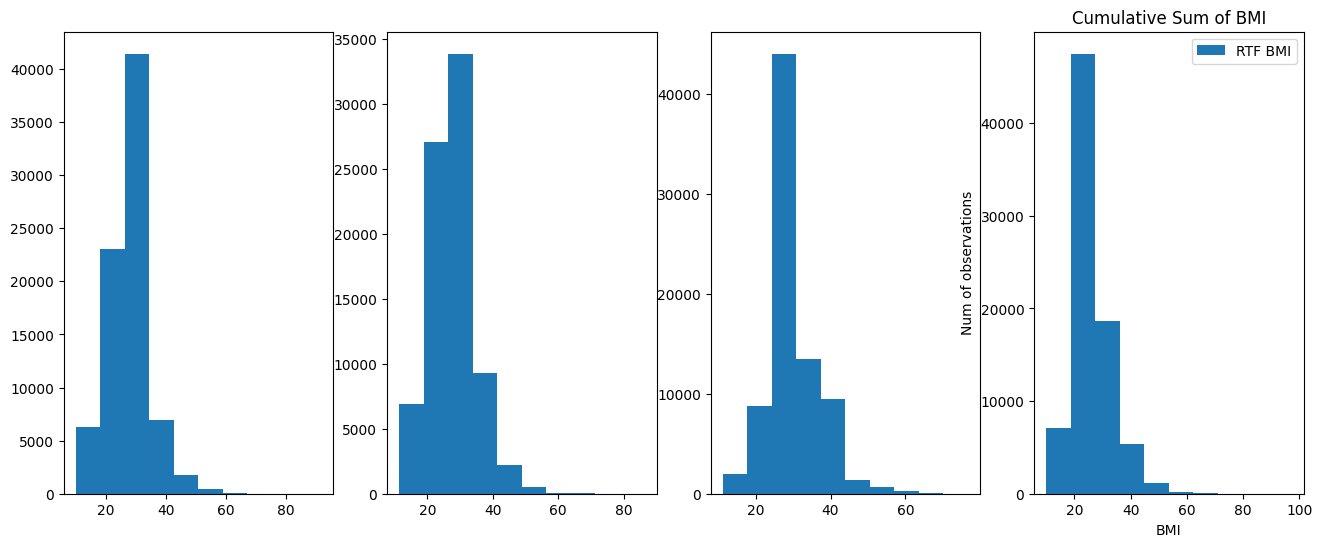

In [ ]:

df = pd.DataFrame(data)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))
# Calculate cumulative sum and plot
axes[0].hist(df['bmi'], label='Cumulative BMI')
axes[1].hist(tvae['bmi'], label='TVAE BMI')
axes[2].hist(ctgan['bmi'], label='CTGAN BMI')
axes[3].hist(synthetic_data['bmi'], label='RTF BMI')
plt.xlabel('BMI')
plt.ylabel('Num of observations')
plt.title('Cumulative Sum of BMI')
plt.legend()
plt.show()


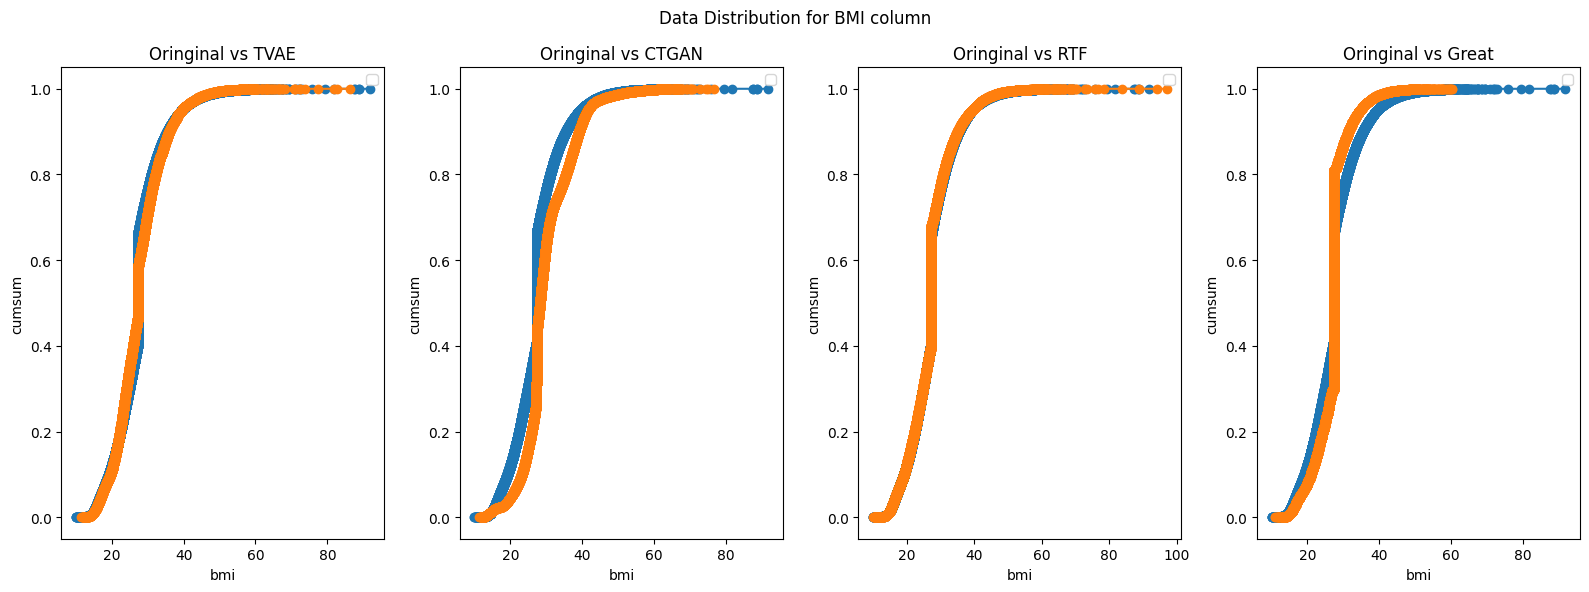

In [ ]:

# No of data points used
N = len(data['bmi'])

# normal distribution
data0 = data['bmi']
data1 = tvae['bmi']
data2 = ctgan['bmi']
data3 = synthetic_data['bmi']
data4 = great['bmi']

# sort the data in ascending order
x = np.sort(data0)
x1 = np.sort(data1)
x2 = np.sort(data2)
x3 = np.sort(data3)
x4 = np.sort(data4)

# get the cdf values of y
y = np.arange(N) / float(N)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))


# plotting

plt.suptitle('Data Distribution for BMI column')
plt.xticks(np.arange(0, 100, 20))

axes[0].plot(x, y, marker='o')
axes[0].plot(x1, y, marker='o')


axes[1].plot(x, y, marker='o')
axes[1].plot(x2, y, marker='o')

axes[2].plot(x, y, marker='o')
axes[2].plot(x3, y, marker='o')

axes[3].plot(x, y, marker='o')
axes[3].plot(x4, y, marker='o')

# Add xticks on the middle of the group bars
for i in range(4):
  axes[i].set_xlabel('bmi')
  axes[i].set_ylabel('cumsum')
  axes[i].legend()


axes[0].set_title('Oringinal vs TVAE')
axes[1].set_title('Oringinal vs CTGAN')
axes[2].set_title('Oringinal vs RTF')
axes[3].set_title('Oringinal vs Great')

plt.tight_layout()

plt.show()

In [ ]:
numeric_cols = data.select_dtypes(include=np.number)

print(numeric_cols)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      73.0             0              0  24.77          3.5   
1      80.0             0              0  24.60          5.7   
2      38.0             0              0  24.33          4.0   
3      26.0             0              0  18.87          5.0   
4      61.0             1              0  22.11          4.5   
...     ...           ...            ...    ...          ...   
79995  49.0             0              0  32.98          5.7   
79996  15.0             0              0  28.10          5.0   
79997  42.0             0              0  26.14          5.8   
79998  37.0             0              0  24.96          6.2   
79999  23.0             0              0  27.99          5.0   

       blood_glucose_level  diabetes  
0                       80         0  
1                      145         1  
2                      158         0  
3                      100         0  
4                       85         0

In [ ]:
# Calculate the mean of absolute values
mean_abs = data[].abs().mean()

# Take the natural logarithm (log) of the mean absolute values
log_mean_abs = np.log(mean_abs)

# Calculate the mean of absolute values
mean_abs1 = synthetic_data['blood_glucose_level','bmi','blood_glucose_level'].abs().mean()

# Take the natural logarithm (log) of the mean absolute values
log_mean_abs1 = np.log(mean_abs1)

plt.scatter(log_mean_abs,log_mean_abs1)
plt.xlabel('Columns')
plt.ylabel('Log Mean Absolute Value')
plt.title('Log Mean Absolute Value of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

KeyError: ('blood_glucose_level', 'bmi', 'blood_glucose_level')